##                         Climate Physics and Climate Dynamics(2022/23)

###                               



  ###                        Radiation and Energy Balance Models

These small Notbook aim to buildone-dimensional
energy balance model (EBM1), interpret the result from these models, and show the power and limitation of these models   
--------------------------------

 one-dimensional
energy balance model (EBM1) :

$$ Cp\frac{∂T_{lat}}{∂t}= S(1 − α) − 4εσT_{lat}^4 - k(T_{lat} - T_{global})$$


In [1]:
# important library
import math
import matplotlib.pyplot as plt
import numpy as np

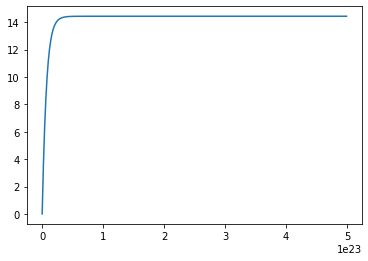

In [2]:
#---- Set default constants
sigma    =  5.67e-8         # Stefan-Boltman constant
ems      =  0.6             # Emmisitivity
tc       =  3.81            # Transport constants
thc      =  1.05e23         # Total Heat Capacity
dt       =  1.0e21          # dt
nstep    =  400             # nstep
SR       =  1370            # Solar constant

sfrac  = np.zeros(18)
albedo = np.zeros(18)
Tlat   = np.zeros(18)

# Read inputs from file zone.dat
file1 = open("zone.dat","r")
file1.readline()

for i in range(18):
    zone,sfrac[i],albedo[i],Tlat[i] = file1.readline().split()
    Tlat[i]  = Tlat[i] + 273.14
file1.close()

# This function calculates T global
Tgg = 0.0
def Calculate_Tglobal(Temp,Tgg,ni):
    Lat = np.zeros(ni)
    wgt = np.zeros(ni)
    Tgg = 0.0
    swg = 0
    cni= ni
    pi= 3.141592
    for i in range(ni):
        Lat[i] = -85 + (i-1)*10
        wgt[i] = math.cos(abs(Lat[i])*pi/180.)
        swg   = swg + wgt[i] 
        Tgg = Tgg + Temp[i]*wgt[i]
    Tgg = Tgg/swg
    return Tgg

TG = [] # This list will store T global for ploting later
TL = [] # This list will store T lat at equilibrium for ploting later
Time = [] # This list will store  the time for T global plot

for j in range(500):
    Tg = Calculate_Tglobal(Tlat,Tgg,18)
    for i in range(18):
        Rin     = sfrac[i]*SR*(1-albedo[i])  # Incoming Energy
        Rout    = 4.0*ems*sigma*Tlat[i]**4   # Outgoing Enegy
        Trans   = tc*(Tlat[i] - Tg)          # Energy Flux
        Fn      = (Rin - Rout - Trans)/thc   # Tendency
        Tf      = Tlat[i] + Fn*dt               
        Tlat[i] = Tf
        if(j==499):
            TL.append(Tlat[i]-273.14)
    TG.append(Tg-273.14)
    Time.append(j*dt)

plt.plot(Time,TG)
plt.show()
zone = [-90,-80,-70,-60,-50,-40,-30,-20,-10,10,20,30,40,50,60,70,80,90]


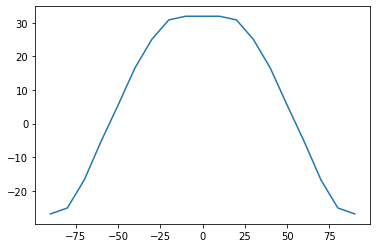

In [3]:
plt.plot(zone,TL)


## 1

#### sensitivity of the model to heat transfer coefficient

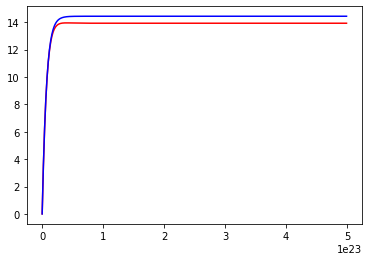

In [5]:
tc1 = 2  # different value for transfer coefficient


sfrac1  = np.zeros(18)
albedo1 = np.zeros(18)
Tlat1   = np.zeros(18)

# Read inputs from file zone.dat
file2 = open("zone.dat","r")
file2.readline()

for i in range(18):
    zone,sfrac1[i],albedo1[i],Tlat[i] = file2.readline().split()
    Tlat1[i]  = Tlat1[i] + 273.14
file2.close()

# This function calculates T global
Tgg1 = 0.0
def Calculate_Tglobal1(Temp,Tgg,ni):
    Lat = np.zeros(ni)
    wgt = np.zeros(ni)
    Tgg = 0.0
    swg = 0
    cni= ni
    pi= 3.141592
    for i in range(ni):
        Lat[i] = -85 + (i-1)*10
        wgt[i] = math.cos(abs(Lat[i])*pi/180.)
        swg   = swg + wgt[i] 
        Tgg = Tgg + Temp[i]*wgt[i]
    Tgg = Tgg/swg
    return Tgg

TG1 = [] # This list will store T global for ploting later
TL1 = [] # This list will store T lat at equilibrium for ploting later
Time1 = [] # This list will store  the time for T global plot

for j in range(500):
    Tg1 = Calculate_Tglobal1(Tlat1,Tgg1,18)
    for i in range(18):
        Rin1     = sfrac1[i]*SR*(1-albedo1[i])  # Incoming Energy
        Rout1    = 4.0*ems*sigma*Tlat1[i]**4   # Outgoing Enegy
        Trans1   = tc1*(Tlat1[i] - Tg1)          # Energy Flux
        Fn1      = (Rin1 - Rout1 - Trans1)/thc   # Tendency
        Tf1      = Tlat1[i] + Fn1*dt               
        Tlat1[i] = Tf1
        if(j==499):
            TL1.append(Tlat1[i]-273.14)
    TG1.append(Tg1-273.14)
    Time1.append(j*dt)


plt.plot(Time,TG1,"red") ## When  Transport constants equal 2
plt.plot(Time,TG,"blue")## When  Transport constants equal 3.8
plt.show()


 When  Transport  decrase that leads to decrase in equilibrium temperature that means by decrease Transport   earth is cooling 
and by increase decrease Transport earth is warming

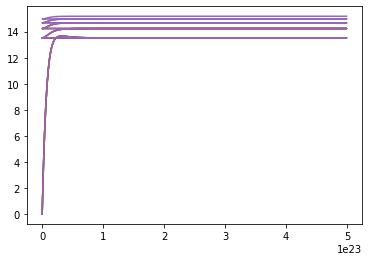

In [6]:
#### another way (by use for loop)


sfrac2  = np.zeros(18)
albedo2 = np.zeros(18)
Tlat2   = np.zeros(18)

# Read inputs from file zone.dat
file3 = open("zone.dat","r")
file3.readline()

for i in range(18):
    zone,sfrac2[i],albedo2[i],Tlat2[i] = file3.readline().split()
    Tlat2[i]  = Tlat2[i] + 273.14
file3.close()

# This function calculates T global
Tgg2 = 0.0
def Calculate_Tglobal2(Temp,Tgg,ni):
    Lat = np.zeros(ni)
    wgt = np.zeros(ni)
    Tgg = 0.0
    swg = 0
    cni= ni
    pi= 3.141592
    for i in range(ni):
        Lat[i] = -85 + (i-1)*10
        wgt[i] = math.cos(abs(Lat[i])*pi/180.)
        swg   = swg + wgt[i] 
        Tgg = Tgg + Temp[i]*wgt[i]
    Tgg = Tgg/swg
    return Tgg

TG2 = [] # This list will store T global for ploting later
TL2 = [] # This list will store T lat at equilibrium for ploting later
Time3 = [] # This list will store  the time for T global plot
for tc2 in range(1,10,2): # diffrent value of tc
    for j in range(500):
        Tg2 = Calculate_Tglobal2(Tlat2,Tgg2,18)
        for i in range(18):
            Rin2    = sfrac2[i]*SR*(1-albedo2[i])  # Incoming Energy
            Rout2   = 4.0*ems*sigma*Tlat2[i]**4   # Outgoing Enegy
            Trans2   = tc2*(Tlat2[i] - Tg2)          # Energy Flux
            Fn2      = (Rin2 - Rout2 - Trans2)/thc   # Tendency
            Tf2     = Tlat2[i] + Fn2*dt               
            Tlat2[i] = Tf2
            if(j==499):
                TL2.append(Tlat2[i]-273.14)
        TG2.append(Tg2-273.14)
        Time3.append(j*dt)



#plt.plot(Time,TG1,"red"),plt.plot(Time,TG1,"green")
    plt.plot(Time3,TG2)
plt.show()


 ## 2
 #### limitations of using this model for climate change study
 
 1-these model assume idealized balance between income energy and outcome which is not what happen in real world

2- in these modal  there is one value of Temperature for any latitude in climet's system regardless of longtitude and that is not realistic in climate's system

3 - inability to reproduce important atmospheric phenomena

4-in these model all the  earth((ocien and land)   have the same heat capacity which is not relastic 

## References


Lecture Notes
